In [ ]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data = pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv')
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119567 entries, 0 to 119566
Data columns (total 22 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  119567 non-null  int64  
 1   Age                                     119567 non-null  int64  
 2   Type of Travel                          119567 non-null  int64  
 3   Class                                   119567 non-null  int64  
 4   Flight Distance                         119567 non-null  int64  
 5   Departure Delay                         119567 non-null  int64  
 6   Arrival Delay                           119567 non-null  float64
 7   Departure and Arrival Time Convenience  119567 non-null  float64
 8   Ease of Online Booking                  119567 non-null  float64
 9   Check-in Service                        119567 non-null  float64
 10  Online Boarding                         1195

In [ ]:
data.describe()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
count,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,...,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000,119567.000000
mean,0.493188,39.858021,0.308538,0.587027,1223.933627,14.909532,15.237959,3.206838,2.879172,3.294747,...,3.386185,3.456221,3.380381,3.294053,3.213788,3.646399,2.817943,3.380423,3.637333,3.105062
std,0.499956,15.030382,0.461892,0.623920,999.732592,38.310203,38.637766,1.386886,1.298754,1.266249,...,1.285412,1.311765,1.295580,1.310393,1.324438,1.165786,1.253511,1.327173,1.167878,0.970545
min,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,28.000000,0.000000,0.000000,441.000000,0.000000,0.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000
50%,0.000000,40.000000,0.000000,1.000000,868.000000,0.000000,0.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000
75%,1.000000,51.000000,1.000000,1.000000,1775.000000,13.000000,13.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,1.000000,85.000000,1.000000,2.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [ ]:
from imblearn.over_sampling import SMOTE

# Features and target
X = data.drop('Loyalty', axis=1)
y = data['Loyalty']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine into a balanced dataset
balanced_data = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Loyalty'])], axis=1)
# Verify class distribution
print("Balanced Class Distribution:\n", balanced_data['Loyalty'].value_counts())

Balanced Class Distribution:
 Loyalty
1    52808
4    52808
3    52808
2    52808
Name: count, dtype: int64


In [ ]:
data['Class'].value_counts()

Class
0    58157
1    52631
2     8779
Name: count, dtype: int64

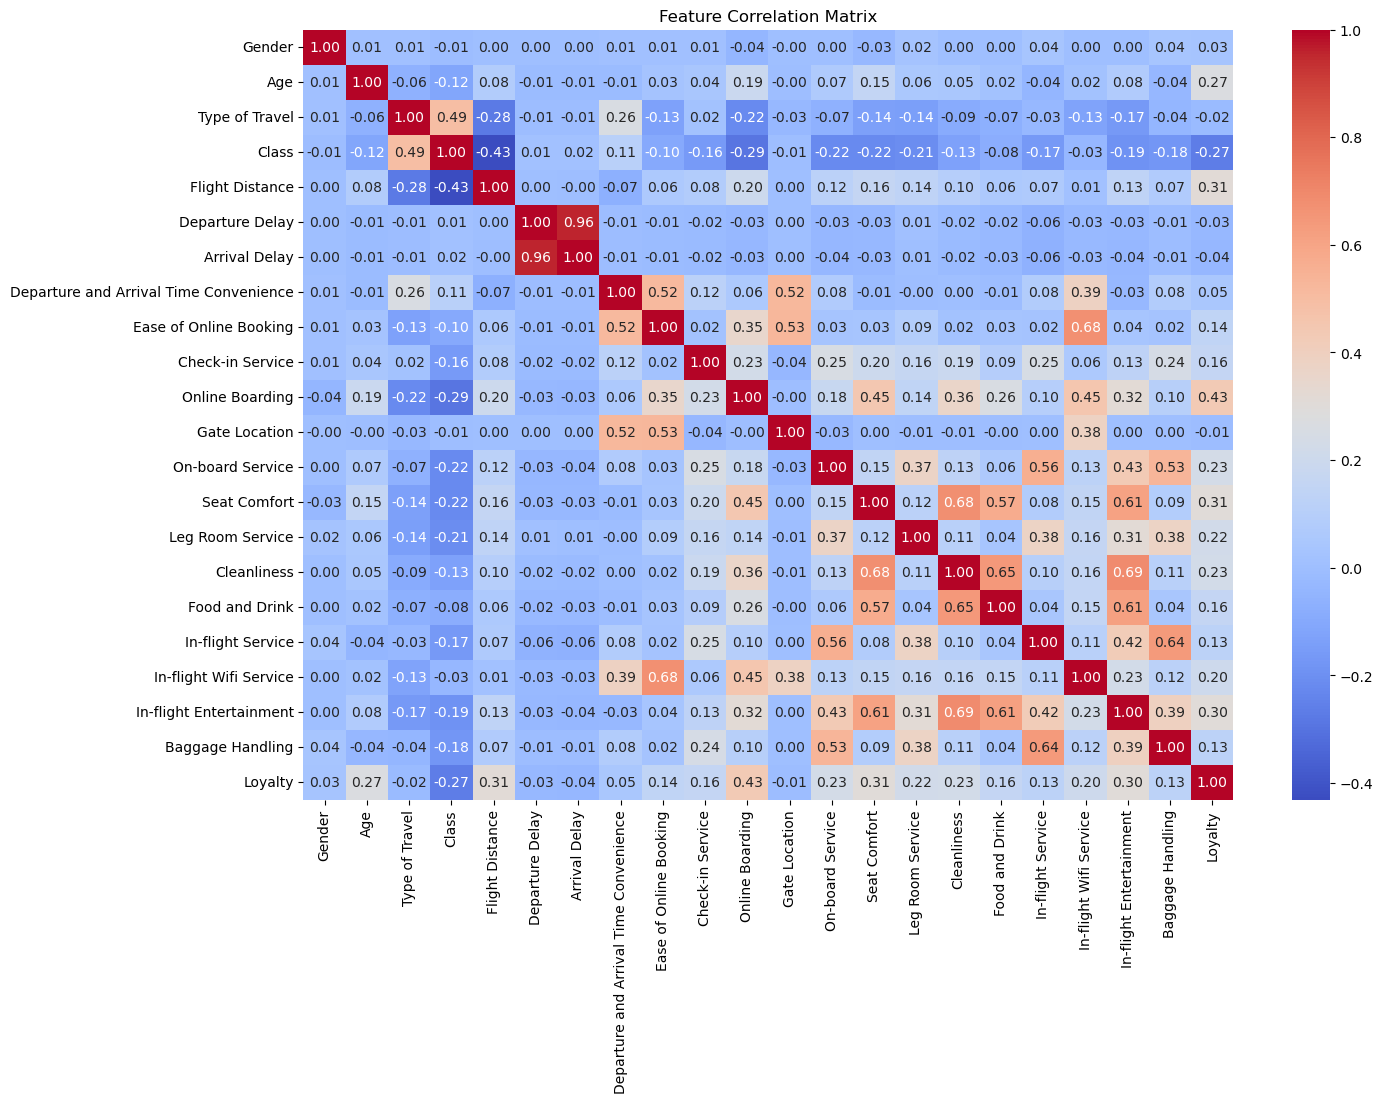

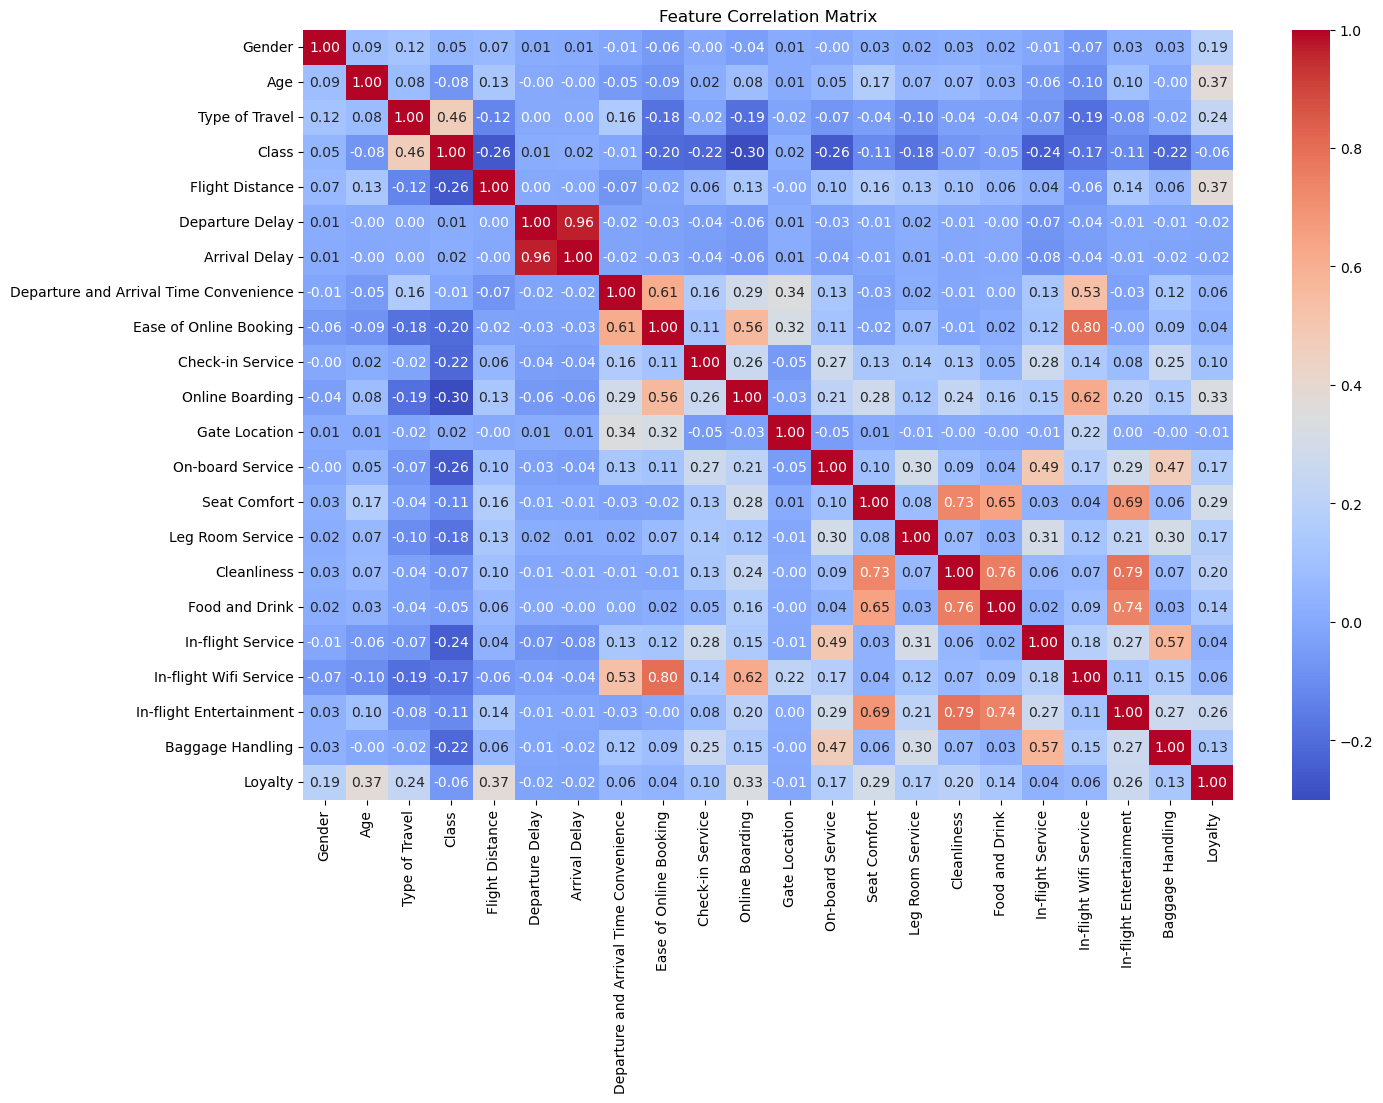

In [ ]:
import seaborn as sns

# Calculate and plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

# Calculate and plot the correlation matrix
plt.figure(figsize=(15, 10))
correlation_matrix = balanced_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:

# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)

# Correlation-based selection
correlation_threshold = 0.2
correlation_features = sorted_loyalty_correlations[sorted_loyalty_correlations > correlation_threshold].index.tolist()
correlation_features.remove('Loyalty')  # Remove target

# KBest selection (already provided)
kbest_features = ['Type of Travel', 'Online Boarding', 'Class', 'In-flight Entertainment',
                  'In-flight Wifi Service', 'Seat Comfort', 'Leg Room Service',
                  'On-board Service', 'Flight Distance', 'Cleanliness']

# Combine both feature sets
combined_features = list(set(correlation_features) | set(kbest_features))

print("Combined Features from Correlation and KBest:")
print(combined_features)

#------------------------------------------------------------------------------------------#
# Recalculate the correlation matrix - Balanced Data
corr_matrix = balanced_data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)

# Correlation-based selection
correlation_threshold = 0.2
correlation_features = sorted_loyalty_correlations[sorted_loyalty_correlations > correlation_threshold].index.tolist()
correlation_features.remove('Loyalty')  # Remove target

# KBest selection (already provided)
kbest_features = ['Type of Travel', 'Online Boarding', 'Class', 'In-flight Entertainment',
                  'In-flight Wifi Service', 'Seat Comfort', 'Leg Room Service',
                  'On-board Service', 'Flight Distance', 'Cleanliness']

# Combine both feature sets
combined_features = list(set(correlation_features) | set(kbest_features))

print("Combined Features from Correlation and KBest:")
print(combined_features)


Loyalty                                   1.000000
Online Boarding                           0.433505
Flight Distance                           0.311779
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service                         0.126431
Departure and Arrival Time Convenience    0.048320
Arrival Delay                             0.038125
Departure Delay                           0.033670
Gender                         

                                   Feature    Importance
2                           Type of Travel  26790.577679
10                         Online Boarding  19783.833429
3                                    Class  10699.116102
19                 In-flight Entertainment  10586.892955
18                  In-flight Wifi Service   7575.768004
13                            Seat Comfort   7538.743633
14                        Leg Room Service   5743.901157
12                        On-board Service   5565.886301
4                          Flight Distance   5539.139797
15                             Cleanliness   5424.034253
20                        Baggage Handling   3510.168021
8                   Ease of Online Booking   3384.507793
17                       In-flight Service   3357.364248
1                                      Age   3271.730866
9                         Check-in Service   2556.765420
7   Departure and Arrival Time Convenience   2481.461886
16                          Foo

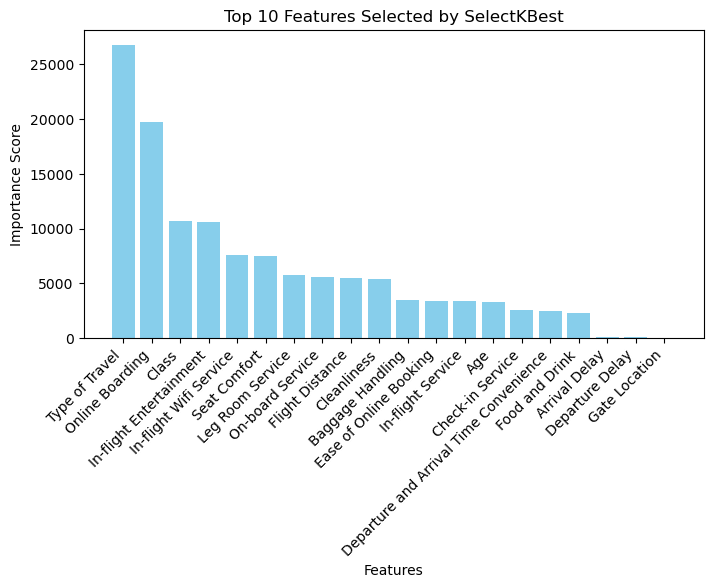

----------------------------------------Balanced Data KBest------------------------------------------
                                   Feature    Importance
2                           Type of Travel  69361.956648
10                         Online Boarding  53600.784731
18                  In-flight Wifi Service  46962.010563
8                   Ease of Online Booking  33255.285167
3                                    Class  20628.167865
7   Departure and Arrival Time Convenience  15809.004363
4                          Flight Distance  14303.879729
1                                      Age  13846.960474
19                 In-flight Entertainment  12815.293545
13                            Seat Comfort  11102.959731
12                        On-board Service   9799.157641
17                       In-flight Service   7476.504933
14                        Leg Room Service   7279.087450
15                             Cleanliness   6788.966713
9                         Check-in Service 

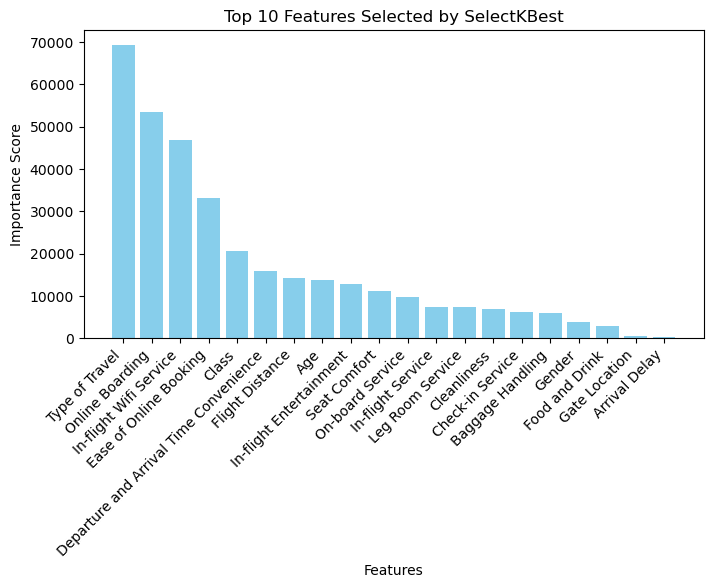

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif for classification problems
import pandas as pd

X = data.drop(columns=['Loyalty'])
y = data['Loyalty']

# Apply SelectKBest to select the top 10 features
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)  # f_classif is used for classification problems
X_selected = selector.fit_transform(X, y)

# Get the scores and feature names
scores = selector.scores_
features = X.columns

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({'Feature': features, 'Importance': scores})
feature_scores = feature_scores.sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_features = feature_scores.head(k)
print(top_features)

# Optionally, filter the dataset to include only the top 10 features
X_top10 = X[top_features['Feature'].values]
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(8, 4))
plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Features Selected by SelectKBest')
plt.show()

print("----------------------------------------Balanced Data KBest------------------------------------------")
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif for classification problems
import pandas as pd

X = balanced_data.drop(columns=['Loyalty'])
y = balanced_data['Loyalty']

# Apply SelectKBest to select the top 10 features
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)  # f_classif is used for classification problems
X_selected = selector.fit_transform(X, y)

# Get the scores and feature names
scores = selector.scores_
features = X.columns

# Create a DataFrame for feature scores
feature_scores = pd.DataFrame({'Feature': features, 'Importance': scores})
feature_scores = feature_scores.sort_values(by='Importance', ascending=False)

# Display the top 10 features
top_features = feature_scores.head(k)
print(top_features)

# Optionally, filter the dataset to include only the top 10 features
X_top10 = X[top_features['Feature'].values]

# Plot feature importances
plt.figure(figsize=(8, 4))
plt.bar(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Features Selected by SelectKBest')
plt.show()

In [ ]:
data.groupby('Type of Travel')['Loyalty'].mean()

Type of Travel
0    3.118922
1    3.074002
Name: Loyalty, dtype: float64

In [ ]:
balanced_data.groupby('Type of Travel')['Loyalty'].mean()

Type of Travel
0    2.377885
1    3.075056
Name: Loyalty, dtype: float64

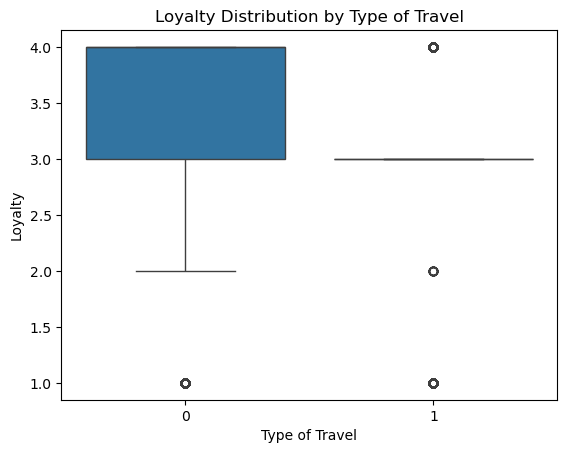

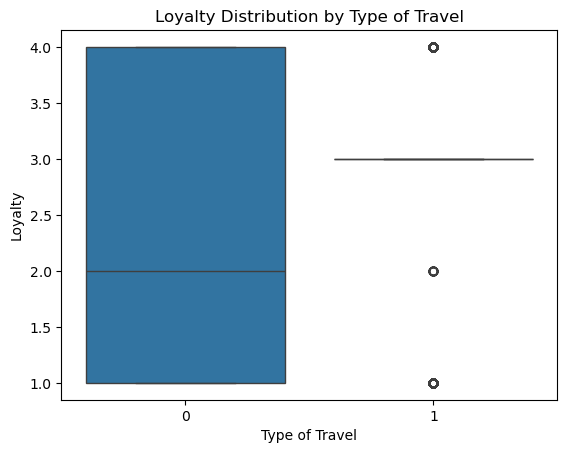

In [ ]:

sns.boxplot(x='Type of Travel', y='Loyalty', data=data)
plt.title('Loyalty Distribution by Type of Travel')
plt.show()
sns.boxplot(x='Type of Travel', y='Loyalty', data=balanced_data)
plt.title('Loyalty Distribution by Type of Travel')
plt.show()



Feature Importances:
Type of Travel                            0.201366
Online Boarding                           0.105141
In-flight Wifi Service                    0.089347
In-flight Entertainment                   0.066312
Class                                     0.064301
Ease of Online Booking                    0.043340
Seat Comfort                              0.043294
Gate Location                             0.038583
On-board Service                          0.037545
Cleanliness                               0.035269
Age                                       0.035254
Leg Room Service                          0.035181
In-flight Service                         0.032714
Baggage Handling                          0.032361
Departure and Arrival Time Convenience    0.030186
Flight Distance                           0.030140
Check-in Service                          0.026255
Food and Drink                            0.020304
Arrival Delay                             0.012230
Departure 

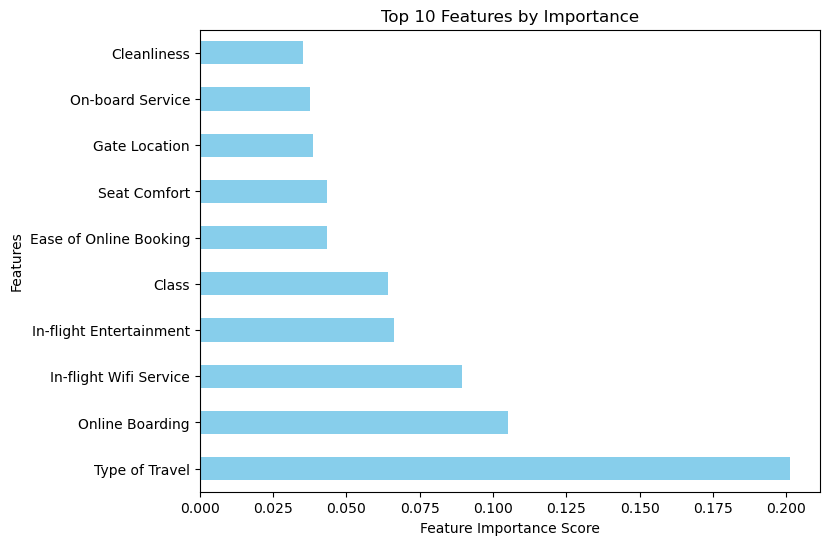


Balanced Data analysis is as below

Feature Importances:
Type of Travel                            0.157687
Online Boarding                           0.114978
In-flight Wifi Service                    0.109038
Ease of Online Booking                    0.086492
Gate Location                             0.057054
Departure and Arrival Time Convenience    0.052641
Age                                       0.047013
In-flight Entertainment                   0.046097
Flight Distance                           0.040940
Class                                     0.039614
Seat Comfort                              0.038821
In-flight Service                         0.030306
On-board Service                          0.029742
Leg Room Service                          0.026262
Cleanliness                               0.025059
Baggage Handling                          0.023160
Check-in Service                          0.021555
Food and Drink                            0.021267
Gender                  

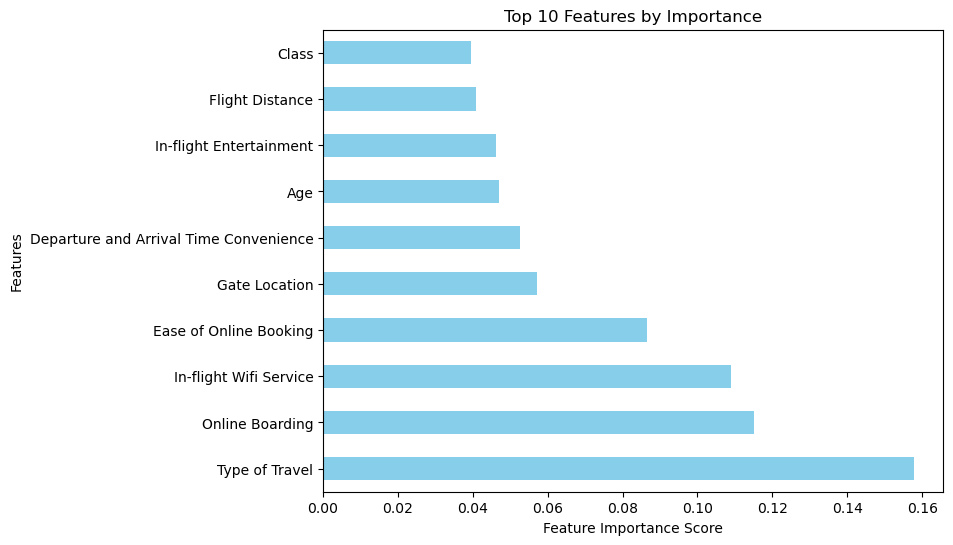

In [ ]:

X = data.drop(columns=['Loyalty'])
y = data['Loyalty']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Train the model
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

# Feature importance values with corresponding feature names
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Print feature names with importance
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

# Plot the top 10 features
print("\nTop 10 Features by Importance:")
feature_importances.nlargest(10).plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Top 10 Features by Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()

#-------------------------------Balanced Data------------------------------#
print("\nBalanced Data analysis is as below\n")

X = balanced_data.drop(columns=['Loyalty'])
y = balanced_data['Loyalty']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Train the model
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

# Feature importance values with corresponding feature names
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Print feature names with importance
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))

# Plot the top 10 features
print("\nTop 10 Features by Importance:")
feature_importances.nlargest(10).plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title('Top 10 Features by Importance')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()



In [ ]:
features = [
    'Type of Travel',
    'Online Boarding',
    'In-flight Wifi Service',
    'Ease of Online Booking',
    'Age',
    'In-flight Entertainment',
    'Flight Distance',
    'Departure and Arrival Time Convenience',
    'Seat Comfort',
    'Class',
    'Cleanliness',
    'On-board Service',
    'Leg Room Service'
]

target = 'Loyalty'

extracted_data = balanced_data[features + [target]]

extracted_data.head()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
0,0,3.0,3.0,3.0,48,5.0,821,3.0,5.0,0,5.0,3.0,2.0,1
1,0,5.0,2.0,2.0,35,5.0,821,2.0,4.0,0,5.0,5.0,5.0,4
2,0,5.0,4.0,4.0,41,3.0,853,4.0,5.0,0,5.0,3.0,3.0,4
3,0,4.0,2.0,2.0,50,5.0,1905,2.0,5.0,0,4.0,5.0,5.0,4
4,0,5.0,3.0,3.0,49,3.0,3470,3.0,4.0,0,5.0,3.0,4.0,4


In [ ]:
extracted_data.head()

,Type of Travel,Online Boarding,In-flight Wifi Service,Ease of Online Booking,Age,In-flight Entertainment,Flight Distance,Departure and Arrival Time Convenience,Seat Comfort,Class,Cleanliness,On-board Service,Leg Room Service,Loyalty
0,0,3.0,3.0,3.0,48,5.0,821,3.0,5.0,0,5.0,3.0,2.0,1
1,0,5.0,2.0,2.0,35,5.0,821,2.0,4.0,0,5.0,5.0,5.0,4
2,0,5.0,4.0,4.0,41,3.0,853,4.0,5.0,0,5.0,3.0,3.0,4
3,0,4.0,2.0,2.0,50,5.0,1905,2.0,5.0,0,4.0,5.0,5.0,4
4,0,5.0,3.0,3.0,49,3.0,3470,3.0,4.0,0,5.0,3.0,4.0,4


In [ ]:
output_file_path = "../../data/feature_selected_data.csv"

extracted_data.to_csv(output_file_path, index=False)

print(f"Encoded data has been successfully saved to {output_file_path}")

Encoded data has been successfully saved to ../../data/feature_selected_data.csv


In [ ]:
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


Loyalty                                   1.000000
Online Boarding                           0.433505
Flight Distance                           0.311779
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service                         0.126431
Departure and Arrival Time Convenience    0.048320
Arrival Delay                             0.038125
Departure Delay                           0.033670
Gender                         

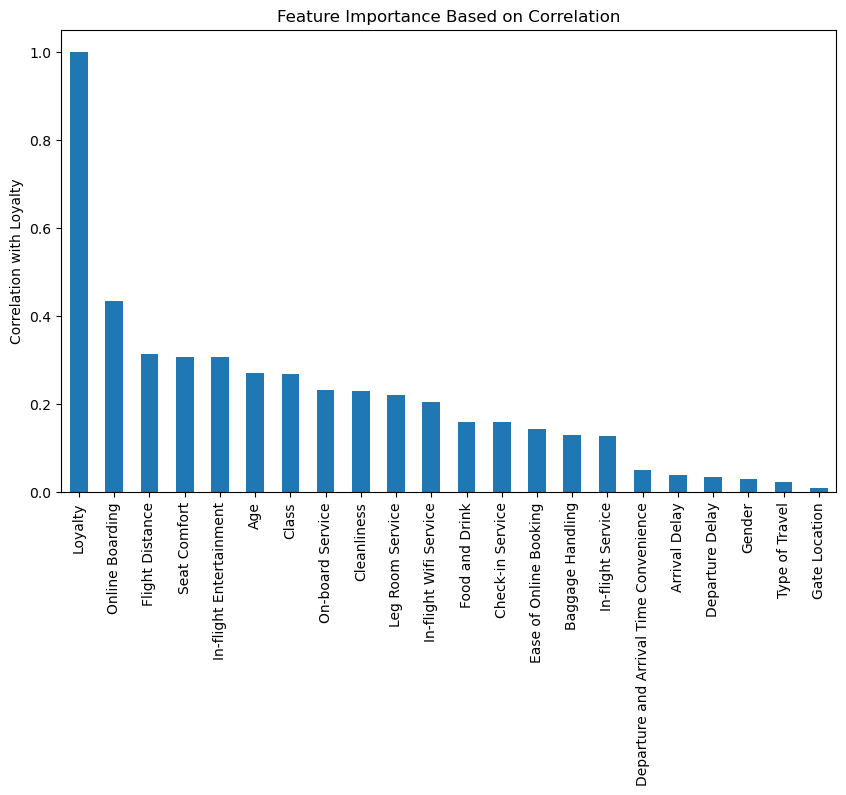

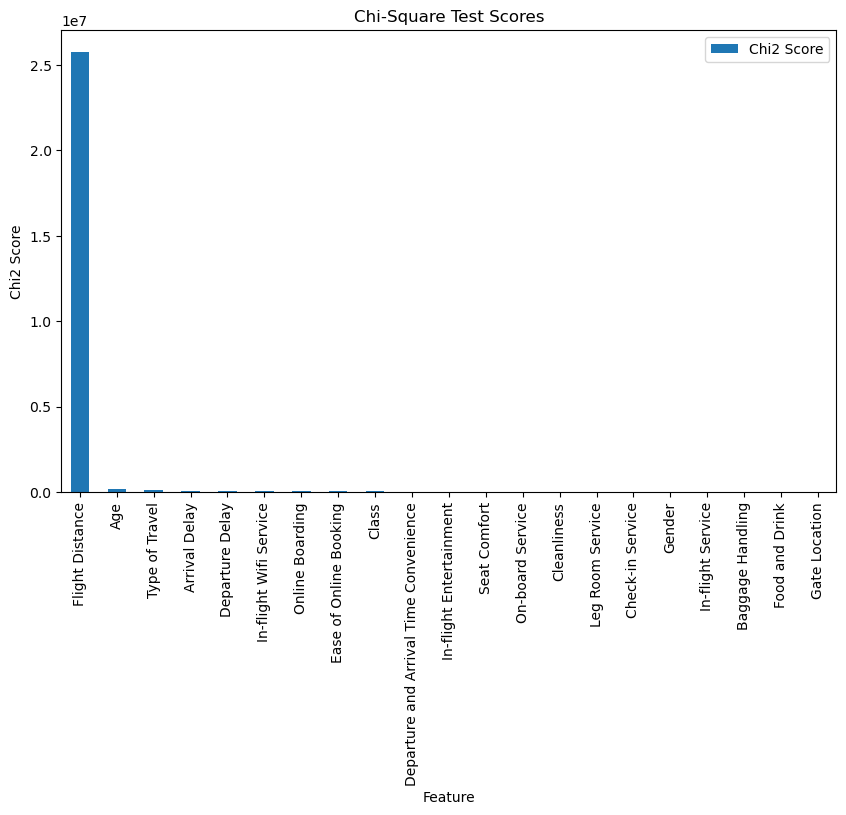

Accuracy of the model: 0.5380


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#supervised Learning

# Extract features (X) and target variable (y)
X = balanced_data.drop(columns=['Loyalty'])  # All features except 'Loyalty'
y = balanced_data['Loyalty']  # Target variable

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Select the correlation with respect to the target variable
correlation_with_target = correlation_matrix['Loyalty'].abs().sort_values(ascending=False)

# Display the most correlated features
print(correlation_with_target)


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Apply SelectKBest with the Chi-Square test
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the scores for each feature
chi2_scores = pd.DataFrame({'Feature': X.columns, 'Chi2 Score': selector.scores_})
chi2_scores = chi2_scores.sort_values(by='Chi2 Score', ascending=False)

# Display the Chi-Square scores
print(chi2_scores)

# Let's select the top 5 features based on the correlation with the target
top_features = correlation_with_target.head(5).index
print("Top 5 Features based on correlation with target:", top_features)

# Alternatively, we can select top features from the Chi-Square scores
top_features_chi2 = chi2_scores['Feature'].head(5)
print("Top 5 Features based on Chi-Square test:", top_features_chi2)

import matplotlib.pyplot as plt

# Plot the feature importance based on correlation
correlation_with_target.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance Based on Correlation")
plt.ylabel("Correlation with Loyalty")
plt.show()

# Plot the Chi-Square scores
chi2_scores.plot(kind='bar', x='Feature', y='Chi2 Score', figsize=(10, 6))
plt.title("Chi-Square Test Scores")
plt.ylabel("Chi2 Score")
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
top_feature = ['Age','Arrival Delay','Type of Travel','Departure Delay']
# Select the top 5 features based on correlation
X_selected = X[top_feature]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.4f}")




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Ensure the correct version of sklearn is being used
assert sklearn.__version__ >= "0.20"

# Select features (X) and target variable (y)
X = data.drop(columns=['Loyalty'])
y = data['Loyalty']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the Logistic Regression model
model = LogisticRegression(solver='saga', max_iter=2000, C=1.0)
model.fit(X_train_scaled, y_train)

# Evaluate the model performance on training and test data
print(f"Training accuracy: {model.score(X_train_scaled, y_train):.4f}")
print(f"Test accuracy: {model.score(X_test_scaled, y_test):.4f}")

# Initialize the RFE (Recursive Feature Elimination) model to select top 5 features
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)

# Create a DataFrame to display feature rankings
selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

# Display the ranking of features
print("Selected features:")
print(selected_features)

# Get the mask for the selected features
selected_mask = rfe.support_

# Use the selected features to train a model
X_selected = X.iloc[:, selected_mask]

# Split the selected features data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train the Logistic Regression model using only selected features
model.fit(X_train, y_train)

# Evaluate the model with selected features
accuracy = model.score(X_test, y_test)
print(f"Accuracy with selected features: {accuracy:.4f}")

Training accuracy: 0.8273
Test accuracy: 0.8277


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Selected features:
                                   Feature  Ranking
18                  In-flight Wifi Service        1
2                           Type of Travel        1
3                                    Class        1
8                   Ease of Online Booking        1
11                           Gate Location        1
10                         Online Boarding        2
19                 In-flight Entertainment        3
17                       In-flight Service        4
7   Departure and Arrival Time Convenience        5
9                         Check-in Service        6
12                        On-board Service        7
15                             Cleanliness        8
20                        Baggage Handling        9
14                        Leg Room Service       10
13                            Seat Comfort       11
16                          Food and Drink       12
0                                   Gender       13
1                                      Age   

In [1]:
import pandas as pd
import numpy as np

import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.20"

data=pd.read_csv('https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv')
data.head()

,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Loyalty
0,1,48,0,0,821,2,5.0,3.0,3.0,4.0,...,3.0,5.0,2.0,5.0,5.0,5.0,3.0,5.0,5,1
1,0,35,0,0,821,26,39.0,2.0,2.0,3.0,...,5.0,4.0,5.0,5.0,3.0,5.0,2.0,5.0,5,4
2,1,41,0,0,853,0,0.0,4.0,4.0,4.0,...,3.0,5.0,3.0,5.0,5.0,3.0,4.0,3.0,3,4
3,1,50,0,0,1905,0,0.0,2.0,2.0,3.0,...,5.0,5.0,5.0,4.0,4.0,5.0,2.0,5.0,5,4
4,0,49,0,0,3470,0,1.0,3.0,3.0,3.0,...,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3,4


In [2]:

# Recalculate the correlation matrix
corr_matrix = data.corr()

# Get the correlation of all features with 'Loyalty'
loyalty_correlations = corr_matrix["Loyalty"]

# Convert all correlations to absolute values (making negative correlations positive)
loyalty_correlations = loyalty_correlations.abs()

# Sort the correlations in descending order
sorted_loyalty_correlations = loyalty_correlations.sort_values(ascending=False)

# Print the sorted positive correlations
print(sorted_loyalty_correlations)


Loyalty                                   1.000000
Online Boarding                           0.433505
Flight Distance                           0.311779
Seat Comfort                              0.305828
In-flight Entertainment                   0.304616
Age                                       0.269590
Class                                     0.266307
On-board Service                          0.229805
Cleanliness                               0.227971
Leg Room Service                          0.218429
In-flight Wifi Service                    0.203990
Food and Drink                            0.158994
Check-in Service                          0.157433
Ease of Online Booking                    0.143225
Baggage Handling                          0.127392
In-flight Service                         0.126431
Departure and Arrival Time Convenience    0.048320
Arrival Delay                             0.038125
Departure Delay                           0.033670
Gender                         

In [3]:
# Get unique classes in "Loyalty"
classes = data['Loyalty'].unique()

# Store correlations for each class
correlations_by_class = {}

for cls in classes:
    # Create binary labels
    binary_loyalty = (data['Loyalty'] == cls).astype(int)

    # Replace the "Loyalty" column with binary labels temporarily
    data['Binary_Loyalty'] = binary_loyalty

    # Calculate correlation matrix
    corr_matrix = data.corr()

    # Get correlations with the binary "Loyalty"
    loyalty_correlations = corr_matrix["Binary_Loyalty"].drop('Binary_Loyalty')  # Exclude self-correlation

    # Convert to absolute values and sort
    sorted_correlations = loyalty_correlations.abs().sort_values(ascending=False)

    # Store the sorted correlations
    correlations_by_class[cls] = sorted_correlations

# Print correlations for each class
for cls, correlations in correlations_by_class.items():
    print(f"\nTop Correlated Features for Class {cls}:\n{correlations}")



Top Correlated Features for Class 1:
Loyalty                                   0.844157
Online Boarding                           0.269013
Type of Travel                            0.251678
Age                                       0.221980
Flight Distance                           0.184140
Departure and Arrival Time Convenience    0.167538
Seat Comfort                              0.135889
Ease of Online Booking                    0.134995
In-flight Wifi Service                    0.126225
In-flight Entertainment                   0.099890
On-board Service                          0.098316
Class                                     0.082478
Check-in Service                          0.076916
Cleanliness                               0.072249
Leg Room Service                          0.063466
Food and Drink                            0.057014
Gender                                    0.031297
Gate Location                             0.022410
In-flight Service                         0.

In [4]:
import pandas as pd

# Define top features for each class, now including Class 4
top_features = {
    "Class 1": {
        "top_2": ["Online Boarding", "Type of Travel"],
        "top_5": ["Online Boarding", "Type of Travel", "Age", "Flight Distance", "Departure and Arrival Time Convenience"],
        "top_10": ["Online Boarding", "Type of Travel", "Age", "Flight Distance", "Departure and Arrival Time Convenience",
                   "Seat Comfort", "Ease of Online Booking", "In-flight Wifi Service", "In-flight Entertainment", "On-board Service"]
    },
    "Class 2": {
        "top_2": ["In-flight Wifi Service", "Ease of Online Booking"],
        "top_5": ["In-flight Wifi Service", "Ease of Online Booking", "Online Boarding", "Type of Travel", "Departure and Arrival Time Convenience"],
        "top_10": ["In-flight Wifi Service", "Ease of Online Booking", "Online Boarding", "Type of Travel", "Departure and Arrival Time Convenience",
                   "Age", "Flight Distance", "Baggage Handling", "In-flight Service", "Class"]
    },
    "Class 3": {
        "top_2": ["Type of Travel", "Class"],
        "top_5": ["Type of Travel", "Class", "Online Boarding", "In-flight Entertainment", "Leg Room Service"],
        "top_10": ["Type of Travel", "Class", "Online Boarding", "In-flight Entertainment", "Leg Room Service",
                   "In-flight Wifi Service", "Seat Comfort", "On-board Service", "Cleanliness", "Baggage Handling"]
    },
    "Class 4": {
        "top_2": ["Online Boarding", "In-flight Entertainment"],
        "top_5": ["Online Boarding", "In-flight Entertainment", "Class", "Type of Travel", "Seat Comfort"],
        "top_10": ["Online Boarding", "In-flight Entertainment", "Class", "Type of Travel", "Seat Comfort",
                   "Leg Room Service", "Cleanliness", "Flight Distance", "On-board Service", "In-flight Wifi Service"]
    }
}

# Create datasets and save them as CSV files
for dataset_name, num_features in zip(["Dataset_1", "Dataset_2", "Dataset_3"], [2, 5, 10]):
    dataset = pd.DataFrame()
    for class_name in top_features:
        features = top_features[class_name][f"top_{num_features}"]
        # Ensure no duplicate columns when combining
        dataset = pd.concat([dataset, data[features]], axis=1)

    # Add 'Loyalty' column to each dataset
    dataset['Loyalty'] = data['Loyalty']

    # Remove duplicate columns
    dataset = dataset.loc[:, ~dataset.columns.duplicated()]

    # Save each dataset as a CSV file
    dataset.to_csv(f'{dataset_name}.csv', index=False)

    # Print confirmation
    print(f"{dataset_name} has been saved as CSV.")


Dataset_1 has been saved as CSV.
Dataset_2 has been saved as CSV.
Dataset_3 has been saved as CSV.


[0.00865061 0.03529669 0.2041267  0.06176173 0.03144184 0.01216668
 0.0122146  0.03039901 0.04309667 0.02620273 0.0981898  0.03987868
 0.03695125 0.04306977 0.03813774 0.0362579  0.01903521 0.02996861
 0.09375181 0.0676685  0.03173348]


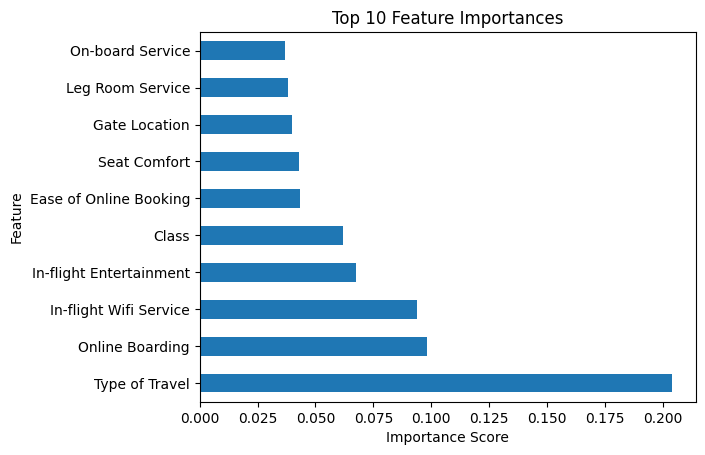

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/HWhr3000/F21DL_Coursework_grp2/main/data/encoded/encoded_data.csv")

# Selecting independent variables (X) and target variable (y)
# Dropping non-numeric and irrelevant columns for modeling
X = data.select_dtypes(include=[np.number]).drop(columns=["Loyalty"])
y = data["Loyalty"]  # Target column

# Filling missing values with 0
X = X.fillna(0)
y = y.fillna(0)

# Train ExtraTreesClassifie
model = ExtraTreesClassifier()
model.fit(X, y)

# Print feature importances
print(model.feature_importances_)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()